# 1. 순환 신경망(Recurrent Neural Network, RNN)




*   RNN은 은닉층의 노드에서 활성화 함수를 통해 나온  결과값을 출력층에 보냄과 동시에 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고 있다.

*   RNN에서 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드를 셀(cell)이라고 하는데 이는 이전의 값을 기억하는 특징을 갖고 있어 메모리 셀 또는 RNN셀이라고 한다.

*   메모리 셀이 다음 시점의 메모리 셀에게 보내는 값을 은닉 상태(hidden state)라고 함
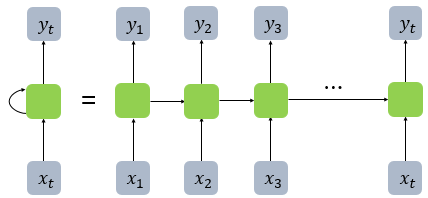

RNN은 위와 같은 그림으로 표현할 수 있음



위와 같은 연산과정을 수식으로 표현하면 다음과 같다.


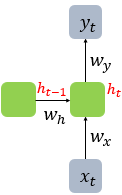

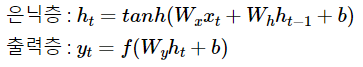


# 1-1 자연어 처리(NLP)에서의 RNN



자연어 처리에서 입력 x_(t)는 대부분 단어 벡터로 간주, 단어 벡터의 차원을 d라고 하고 은닉 상태의 크기를 D_(h)라고 하면 다음과 같은 식으로 나타낼 수 있다.


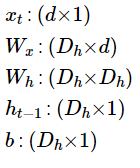

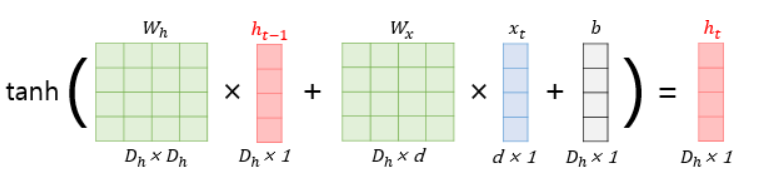

# 1-2 RNN 구현하기




*   책의 앞부분에 나온 텐서 다루기 파트에서 NLP의 경우 3차원 텐서를 

  **(배치사이즈(batch size), 문장의 길이(timesteps), 단어벡터의 차원(input_size)** 

  이와 같은 형태로 다룬다 했음

*   은닉상태의 크기는 메모리 셀의 용량을 의미한다.



In [ ]:
import numpy as np

timesteps = 10 
input_size = 4 
hidden_size = 8

inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서 # (10 x 4) size의 matrix 생성

print(inputs)

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

[[0.32994622 0.84873861 0.47397864 0.63712478]
 [0.09590398 0.10487571 0.31011117 0.29502425]
 [0.15757419 0.19726124 0.69829878 0.07938742]
 [0.18364813 0.93772141 0.46317669 0.62332164]
 [0.52652197 0.37185628 0.09434531 0.0456917 ]
 [0.96179309 0.43299898 0.96851714 0.94066126]
 [0.01460475 0.372794   0.25011202 0.4638973 ]
 [0.11105746 0.74038765 0.33740841 0.47967195]
 [0.63203098 0.61519693 0.31280645 0.54556291]
 [0.09521253 0.80265409 0.91803292 0.29695246]]


In [ ]:
print(hidden_state_t) # 8의 크기를 갖는 은닉 상태

[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
Wx = np.random.random((hidden_size, input_size))  # (8 x 4) size의 matrix 생성 / 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8 x 8) size의 matrix 생성 / 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성/ 이 값은 편향(bias).


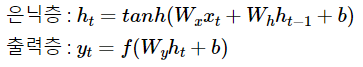


In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨. #input_t의 size는 (1 x 4), (4, )임
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # np.dot()은 행렬의 곱을 해주는 함수 
  # 은닉층 h_t = tanh(Wx * Xt + Wh * Ht-1 + b(bias)) 
  # 계산된 값을 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)에 대입하여 -1과 1사이의 결과값이 출력

  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적

  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.99997881 0.99995848 0.99998552 0.99995859 0.99997821 0.99999924
  0.99921157 0.99980141]
 [0.99989913 0.99990954 0.99993866 0.99979458 0.99986847 0.99999829
  0.99712191 0.99957657]
 [0.99992496 0.99995249 0.99996504 0.99979993 0.99984172 0.99999866
  0.99816666 0.99957498]
 [0.99997519 0.99995797 0.99998495 0.99994729 0.99997858 0.99999901
  0.99903086 0.99979556]
 [0.99996354 0.99985572 0.99995479 0.99987185 0.99987594 0.99999897
  0.99786639 0.99959175]
 [0.99999078 0.99998562 0.99999341 0.99999196 0.99998574 0.99999983
  0.99985291 0.99986915]
 [0.99992022 0.99991561 0.99995219 0.99984494 0.99992997 0.9999982
  0.99738877 0.99965833]
 [0.99996021 0.9999373  0.99997469 0.99990634 0.99996105 0.99999865
  0.99837505 0.99973243]
 [0.99998213 0.9999366  0.99998101 0.99996492 0.99996851 0.99999945
  0.99924682 0.99977829]
 [0.99996691 0.9999775  0.99998777 0.99990843 0.99995415 0.99999896
  0.99910876 0.99974097]]

# 1-3 파이토치 RNN 구현하기 




*   입력의 크기와 은닉 상태의 크기를 결정하는데 은닉 상태의 크기는 RNN에서의 대표적인 하이퍼파라미터이다.




In [ ]:
import torch
import torch.nn as nn

In [ ]:
input_size = 5 # 입력의 크기
hidden_size = 8 # 은닉 상태의 크기

# (batch_size, time_steps, input_size) 
inputs = torch.Tensor(1, 10, 5)

*torch.Tensor(1, 10, 5)*는 배치크기는 1이고 10번의 시점동안 5차원의 입력 벡터가 들어가는 것을 의미

In [ ]:
cell = nn.RNN(input_size, hidden_size, batch_first=True) # batch_first=True을 통해 입력 텐서의 첫번째 차원이 배치크기 임

In [ ]:
outputs, _status = cell(inputs)
print(outputs.shape)

torch.Size([1, 10, 8])


# 1-4 깊은 순환 신경망(DRNN)

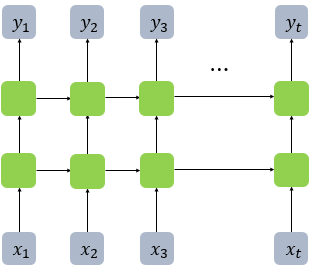

deep RNN은 위 그림과 같은 구조이다. 은닉 상태의 값을 다음 은닉층으로 보내주고 있는 것을 확인할 수 있다.

In [ ]:
inputs = torch.Tensor(1, 10, 5)
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True) # RNN의 하이퍼파라미터인 num_layers를 사용해 층을 쌓아주었다.


# 1-5 양방향 순환 신경망 (Bidirectional Recurrent Neural Network)

기존 RNN은 이전 시점에서의 정보를 사용하여 현재 시점의 데이터를 처리하였는데 양방향 순환 신경망은 현재 데이터의 이후 데이터를 현재 시점의 데이터를 처리하는데에 사용한다.

In [ ]:
cell = nn.RNN(input_size = 5, hidden_size = 8, num_layers = 2, batch_first=True, bidirectional = True) # bidirectional = True 를 통해서 양방향 순환 신경망을 구현

# 1-6 RNN의 한계

RNN은 time_step이 길어진다면 앞의 정보가 뒤로 충분히 뒤로 전달되지 못하는 현상이 발생한다. 이러한 경우 중요한 정보가 시점의 앞 쪽에 존재할 때에는 더 큰 문제가 발생한다.

# 2. LSTM




*   LSTM은 은닉상태를 계산하는 식이 RNN에 비해 복잡해졌고 셀 상태라는 값을 추가했다.

*   LSTM은 긴 시퀀스를 처리하는데 탁월한 성능을 보인다.

    
    
  * LSTM은 아래와 같이 구성되어있다.

   1. 입력 게이트

   2. 삭제 게이트
   
   3. 셀 상태(장기 상태)
   
   4. 출력 게이트와 은닉 상태(단기 상태)







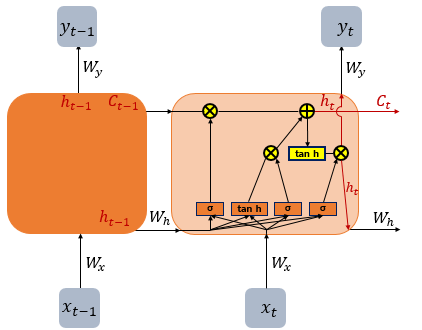

# 2-1 입력 게이트

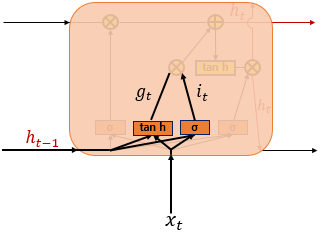

x_(t)와 h_(t-1)는 각각에 가중치가 곱해지고 이 둘을 합친 후에 b(편향)을 더해준다. 

해당 값들은 하이퍼볼릭탄젠트 함수와 시그모이드 함수에 대입이 된다.

입력 게이트에서는 i_(t)와 g_(t)를 통해 기억할 정보의 양 또는 현재 시점의 입력을 얼마나 반영할지를 결정한다.

# 2-2 삭제 게이트

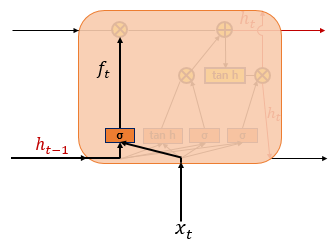

삭제 게이트에서는 f_(t)의 값이 0이면 이전 셀 정보가 많이 삭제된 것이고 1이면 이전 셀 정보를 온전히 갖고 있는 것을 의미한다.

# 2-3 셀 상태

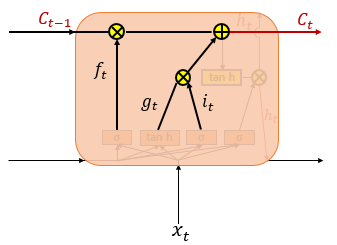

입력 게이트에서 결과로 나온 i_(t)와 g_(t)를 곱한다. 이는 이번에 선택된 **기억할 값**을 의미한다.이후 해당 값을 f_(t) ∘ C_(t-1) 와 더한다. 여기에서 만약 f_(t)의 값이 0이라면 C_(t-1)의 영향력은 0이 되는 것을 의미한다. 이는 이전의 값에 영향을 받지 않고 현재 입력 값으로만 결과가 나오는 것을 의미한다. 이와 같은 수삭을 통해 도출된 값을 현재 시점의 **셀 상태(C_(t))**라고 한다.

# 2-4 출력 게이트와 은닉 상태

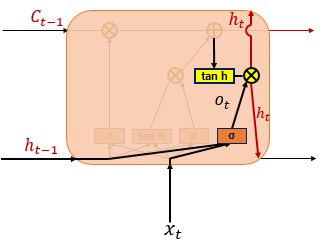

이는 장기상태의 값인 C_(t)인 셀 상태가 하이퍼볼릭탄젠트 함수를 지나게 되어 -1 ~ 1 사이의 출력값이 나오게 된다. 이는 출력게이트의 값인 o_(t)와 계산되어 값이 걸러지는 효과가 발생한다. 

# 2-5 LSTM 구현

In [ ]:
nn.LSTM(input_dim, hidden_size, batch_fisrt=True) # RNN과 똑같은 방식으로 구현한다.